In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
st_columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
#recentDate = session.query(measurement.date).order_by('date').first()
recentDate = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(recentDate.date)

#results = session.query(Emoji.emoji_char, Emoji.emoji_id, Emoji.score).\
 #   order_by(Emoji.score.desc()).all()

2017-08-23


2016-08-23


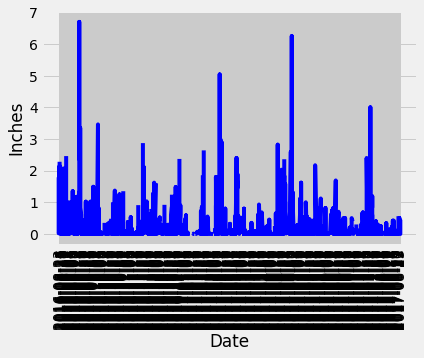

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
import datetime as dt

# Calculate the date one year from the last date in data set.

yearAgoDate = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(yearAgoDate)

# Perform a query to retrieve the data and precipitation scores
#= session.query(measurement).filter_by(measurement.date >= yearAgoDate).count()
precResults = session.query(measurement.station, measurement.date, measurement.prcp).\
    filter(measurement.date >= yearAgoDate). \
    filter(measurement.date <= recentDate.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
#df = pd.DataFrame(precResults[:10], columns=['station','date', 'prcp'])
df = pd.DataFrame(precResults, columns=['station','date', 'prcp'])
df.set_index('date', inplace=False, )
df.head(10)

# Sort the dataframe by date
df.sort_values(by=['date'], inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(df['date'],df['prcp'],color="blue")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation=90)
plt.show()


In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(measurement).group_by(measurement.station).count()
print(stations)

9


In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stationCount = session.query(measurement.station,func.count(measurement.station)).\
    group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
print(stationCount)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowestTemp = session.query(func.min(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()
print("Lowest Temperature: " + str(lowestTemp))

highestTemp = session.query(func.max(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()
print("Highest Temperature: " + str(highestTemp))

avgTemp = session.query(func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()
print("Average Temperature: " + str(avgTemp))

Lowest Temperature: [(54.0,)]
Highest Temperature: [(85.0,)]
Average Temperature: [(71.66378066378067,)]


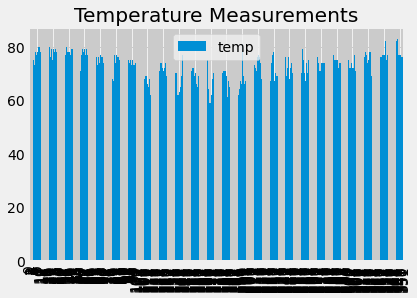

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tempResults = session.query(measurement.date, measurement.tobs).\
    filter(measurement.station == 'USC00519281'). \
    filter(measurement.date >= yearAgoDate). \
    filter(measurement.date <= recentDate.date).all()

temp_df = pd.DataFrame(tempResults, columns=['date', 'temp'])
temp_df.set_index('date', inplace=False, )
temp_df.head(10)

temp_plt = temp_df[['date','temp']].plot(kind='bar',title="Temperature Measurements")
plt.show()


# Close session

In [18]:
# Close Session
session.close()